### Deep Learning

**Definition:**

- Deep learning is a subfield of machine learning that uses algorithms inspired by the structure and function of the brain’s neural networks. 
- As a subfield of ML, DL also algorithms to analyze data, learn from that data, and then make a determination or prediction about new data.

### Data Preperation and Preprocessing

To train a neural network we need a dataset set.
Dataset can be anything as Images, text, sound etc

In [1]:
import numpy as np # for numerical computation
from random import randint #for random number generation
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.utils import shuffle # for shuffling data

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
#print raw data shape
print(len(train_samples))
print(train_samples[67])

# if want see all instances 
# for i in train_samples:
#     print(i)

2100
79


In [5]:
#print raw data labels shape
print(len(train_labels))
print(train_labels[67])

# if want see all instances 
# for i in test_samples:
#     print(i)


2100
0


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
# normalizing our data by rescaling it from whatever range it has to range 0 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [8]:
#print scaled data
print(len(scaled_train_samples))
print(scaled_train_samples[67])

# want see all instances 
# for i in scaled_train_samples:
#     print(i)

2100
[0.6091954]


### Simple Sequential Model ###
Can be defined as a linear stack of layers. It receives the data and passes it through the layers and produces the output


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Artificial neural network are typically organized in layers. 
Different types of layers include

- Dense (or fully connected) Layers
- Convolutional layers
- Pooling Layers
- Recurrent Layers
- Normalization Layers
- Many others

Dense layers are fully coonnected layers were each node is connected to each node in previous layer
Relu is the activation of form $ReLU(a) = max(0,a)$

Softmax output probablity of each class

In [10]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax') 
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Adam is the optimizer used with learning rate of .0001.
Metrics specify what metrics you wanna see while training

In [14]:
model.compile(Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training our model happens when we call the fit( ) function.
Batch specifies how much data we feed to model in one go.
Epoches specify how many times the model will be trained

Shuffle is set true, to shuffle data  removing patterns in data


In [15]:
model.fit(scaled_train_samples, train_labels,batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6910 - accuracy: 0.4819 - 1s/epoch - 7ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6515 - accuracy: 0.6329 - 410ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6145 - accuracy: 0.6948 - 402ms/epoch - 2ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5780 - accuracy: 0.7457 - 410ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5424 - accuracy: 0.7981 - 449ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5085 - accuracy: 0.8267 - 435ms/epoch - 2ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4754 - accuracy: 0.8457 - 416ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4434 - accuracy: 0.8614 - 431ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4146 - accuracy: 0.8790 - 436ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.3889 - accuracy: 0.8886 - 383ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.3665 - accuracy: 0.9010 - 380ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3479 - accuracy: 0.9086 - 386ms/epoch - 2ms/step
Epoc

### Validation Set
Helps us to see how well the model is generalizing on the data that it has not seen during training.
Helps us to look for overfitting, overfitting occurs when our model performs very well on train set but is not good at generalizg for examples it has not seen

##### Creating a Validation Set
* Creating a data structure to hold a validation seprately using *valid_set = (x_val, y_val)* passing it to *fit(validation_data= )* 
* Or pass *validation_split=* parameter inm the *fit( )* function specfing what percentage you wanna use for validation 

 


In [16]:
model.fit(scaled_train_samples, train_labels,
          validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
189/189 - 1s - loss: 0.2631 - accuracy: 0.9339 - val_loss: 0.2663 - val_accuracy: 0.9333 - 694ms/epoch - 4ms/step
Epoch 2/20
189/189 - 0s - loss: 0.2624 - accuracy: 0.9317 - val_loss: 0.2651 - val_accuracy: 0.9333 - 403ms/epoch - 2ms/step
Epoch 3/20
189/189 - 0s - loss: 0.2618 - accuracy: 0.9339 - val_loss: 0.2663 - val_accuracy: 0.9190 - 397ms/epoch - 2ms/step
Epoch 4/20
189/189 - 0s - loss: 0.2615 - accuracy: 0.9323 - val_loss: 0.2650 - val_accuracy: 0.9333 - 414ms/epoch - 2ms/step
Epoch 5/20
189/189 - 0s - loss: 0.2607 - accuracy: 0.9339 - val_loss: 0.2644 - val_accuracy: 0.9333 - 439ms/epoch - 2ms/step
Epoch 6/20
189/189 - 0s - loss: 0.2603 - accuracy: 0.9323 - val_loss: 0.2640 - val_accuracy: 0.9333 - 427ms/epoch - 2ms/step
Epoch 7/20
189/189 - 0s - loss: 0.2598 - accuracy: 0.9339 - val_loss: 0.2618 - val_accuracy: 0.9333 - 380ms/epoch - 2ms/step
Epoch 8/20
189/189 - 0s - loss: 0.2595 - accuracy: 0.9339 - val_loss: 0.2610 - val_accuracy: 0.9333 - 420ms/epoch - 2ms/step


### Test Set
Models are used to make inference after it has been trained
Test set is used for making model inference check. How well can model perform on deployment.
Test data should be processed in the same way  training data was processed

In [17]:
test_labels =  []
test_samples = []

In [18]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [19]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [20]:
# normalizing our data by rescaling it from whatever range it has to range 0 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

### Predict
Over model will predict probablity, the chances a person belonging to a patrticular class 

In [21]:
predictions = model.predict(x=scaled_test_samples, batch_size=10,verbose=0)

In [22]:
predictions.shape

(420, 2)

In [23]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [24]:
rounded_predictions.shape

(420,)

### Visualizing Results

In [25]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

In [26]:
cm = confusion_matrix(y_true= test_labels,
                      y_pred=rounded_predictions)

Main diagonal are correct values

<AxesSubplot:title={'center':'Confusion Matrix'}>

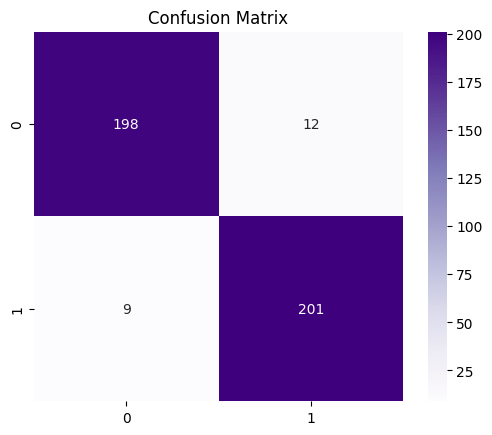

In [27]:
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
classes = ['No side Effect','Side Effect']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')


### Save and Load Model model
Differnt ways of saving a model


#### 1.Save Function
First way is to call save function on model.This save functions saves: 
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.
We need to pass the name with .h5 extension to the save function

In [ ]:
import os.path
#next line basically checks if model is already saved don't save it
if os.path.isfile('medical_trail_model.h5') is False:
    model.save('medical_trial_model.h5')

The saved model can be loaded using the *load_model( )* function by passing the name of saved model 
We look at
- The archicture of model
- Weights of model
- Optimizers of model

In [47]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [48]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
new_model.get_weights()

[array([[ 0.7534571 ,  0.24824175, -0.34736633,  0.7283507 , -0.5603516 ,
          0.4124363 , -0.12634872,  0.5573509 ,  0.18707137,  0.09768706,
          0.05327072, -0.24089974, -0.5935962 ,  0.3333455 ,  0.4327991 ,
          0.00121947]], dtype=float32),
 array([-0.17797248, -0.10688175,  0.        , -0.15727812,  0.        ,
        -0.03539788,  0.20925955, -0.16769744,  0.06169777,  0.1935973 ,
         0.07703411,  0.        ,  0.        , -0.12445618, -0.14399926,
         0.24690191], dtype=float32),
 array([[-4.50978994e-01,  7.02699199e-02,  3.13374028e-02,
         -2.37725630e-01, -1.80971906e-01, -8.53819773e-02,
          4.99000281e-01, -4.64579403e-01, -2.31193900e-02,
         -4.84978735e-01,  5.51173091e-01, -3.02017272e-01,
          5.20827770e-01, -5.40094435e-01, -3.26509416e-01,
          2.18878537e-01,  1.01302028e-01, -3.40356141e-01,
         -2.61468351e-01,  3.76934588e-01, -1.36007726e-01,
         -2.61129200e-01,  2.07674220e-01,  5.37256956e-01,
 

In [50]:
new_model.optimizer

#### 2.To Jason
If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [51]:
# save as JSON
json_string = model.to_json()
# save as YAML
# yaml_string = model.to_yaml()

In [52]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [53]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [54]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. Save Weights

If you only need to save the weights of a model, you can use the following function save the weights only.

In [55]:
model.save_weights('my_model_weights.h5')

In [56]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [57]:
model2.load_weights('my_model_weights.h5')

In [58]:
model2.get_weights()

[array([[ 0.7534571 ,  0.24824175, -0.34736633,  0.7283507 , -0.5603516 ,
          0.4124363 , -0.12634872,  0.5573509 ,  0.18707137,  0.09768706,
          0.05327072, -0.24089974, -0.5935962 ,  0.3333455 ,  0.4327991 ,
          0.00121947]], dtype=float32),
 array([-0.17797248, -0.10688175,  0.        , -0.15727812,  0.        ,
        -0.03539788,  0.20925955, -0.16769744,  0.06169777,  0.1935973 ,
         0.07703411,  0.        ,  0.        , -0.12445618, -0.14399926,
         0.24690191], dtype=float32),
 array([[-4.50978994e-01,  7.02699199e-02,  3.13374028e-02,
         -2.37725630e-01, -1.80971906e-01, -8.53819773e-02,
          4.99000281e-01, -4.64579403e-01, -2.31193900e-02,
         -4.84978735e-01,  5.51173091e-01, -3.02017272e-01,
          5.20827770e-01, -5.40094435e-01, -3.26509416e-01,
          2.18878537e-01,  1.01302028e-01, -3.40356141e-01,
         -2.61468351e-01,  3.76934588e-01, -1.36007726e-01,
         -2.61129200e-01,  2.07674220e-01,  5.37256956e-01,
 